Simple Linear Regression --> It finds the relationship between one independent varaible X and one dependent variable Y by fitting a linear equation to observe Data. It finds the best fit line through the data points.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

In [7]:
# Load DataSet
diabetes=load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]], shape=(442, 10)),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142.

In [8]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

Problem Statement--> To predict disease progression one year after baseline.

In [9]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]], shape=(442, 10))

In [10]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [11]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [17]:
# Convert it into dataframe
data=pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
data['Target']=diabetes.target
data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [24]:
# EDA / Data Cleaning / Data Processing / Data Preparing
# Here the data is already cleaned and processed so we implement ML model here

x=data[["bmi"]]
y=data["Target"]

In [25]:
# Now Train and split the data
x

,bmi
0,0.061696
1,-0.051474
2,0.044451
3,-0.011595
4,-0.036385
...,...
437,0.019662
438,-0.015906
439,-0.015906
440,0.039062


In [26]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: Target, Length: 442, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print(x_train,x_test)
print(y_train,y_test)

          bmi
438 -0.015906
232  0.000261
80   0.012117
46  -0.011595
381 -0.089197
..        ...
255 -0.065486
72  -0.004050
396 -0.030996
235 -0.014828
37   0.011039

[353 rows x 1 columns]           bmi
246 -0.032073
425 -0.040696
293  0.092953
31  -0.065486
359  0.005650
..        ...
277 -0.059019
132 -0.021295
213 -0.070875
286 -0.054707
256  0.160855

[89 rows x 1 columns]
438    104.0
232    259.0
80     143.0
46     190.0
381    104.0
       ...  
255    153.0
72     202.0
396     43.0
235    124.0
37     276.0
Name: Target, Length: 353, dtype: float64 246     78.0
425    152.0
293    200.0
31      59.0
359    311.0
       ...  
277     64.0
132    107.0
213     49.0
286     60.0
256    346.0
Name: Target, Length: 89, dtype: float64


In [28]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [ ]:
model.fit(x_train,y_train) # In backend it will use gradient descent to give optimal coefficients

LinearRegression()

In [32]:
# B1 and B0
print(model.coef_)
print(model.intercept_)

[977.74040067]
151.66780594915235


In [34]:
y_pred=model.predict(x_test)
y_pred

array([120.30830405, 111.87774078, 242.55147149,  87.63987137,
       157.19201836, 170.89168368, 226.74416536, 136.11561019,
       129.79268773, 116.09302241, 189.86045104, 131.90032855,
       121.36212446, 152.97673673, 194.07573268, 215.15214086,
       148.76145509, 119.25448364, 127.68504691, 162.46112041,
       155.08437755, 100.28571628, 141.38471223, 111.87774078,
        90.8013326 , 196.1833735 , 129.79268773, 190.91427145,
       113.9853816 , 163.51494082, 145.59999387, 150.86909591,
       205.66775718, 119.25448364,  95.01661424, 167.73022245,
        80.26312851, 210.93685922, 190.91427145, 127.68504691,
       161.4073    , 145.59999387, 121.36212446, 138.223251  ,
       132.95414896, 102.3933571 , 179.32224695, 113.9853816 ,
       209.88303881, 131.90032855, 144.54617346, 200.39865513,
       107.66245914, 105.55481833, 174.05314491, 137.16943059,
       158.24583877, 121.36212446,  83.42458974, 126.6312265 ,
       122.41594487, 227.79798576, 161.4073    , 131.90

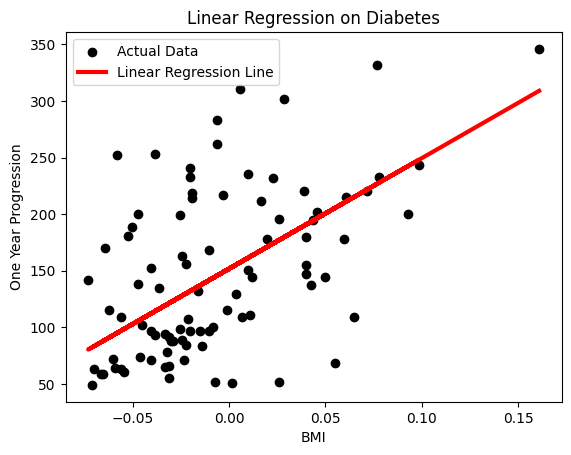

In [35]:
# Now Visualize the model
plt.scatter(x_test,y_test,color="black",label="Actual Data")
plt.plot(x_test,y_pred,color="red",linewidth=3,label="Linear Regression Line")
plt.xlabel("BMI")
plt.ylabel("One Year Progression")
plt.title("Linear Regression on Diabetes")
plt.legend()
plt.show()

In [36]:
# now Check the performance of model
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

3989.8289727609313